In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\Darshit\Downloads\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
purchase = df[df.Purchased==1]
purchase.shape

(143, 5)

In [4]:
not_purchase = df[df.Purchased==0]
not_purchase.shape

(257, 5)

In [6]:
df.groupby('Purchased').mean(numeric_only=True)

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


In [14]:
subdf = df[['Age', 'EstimatedSalary', 'Gender']]
subdf.head()

,Age,EstimatedSalary,Gender
0,19,19000,Male
1,35,20000,Male
2,26,43000,Female
3,27,57000,Female
4,19,76000,Male


<Axes: xlabel='Gender'>

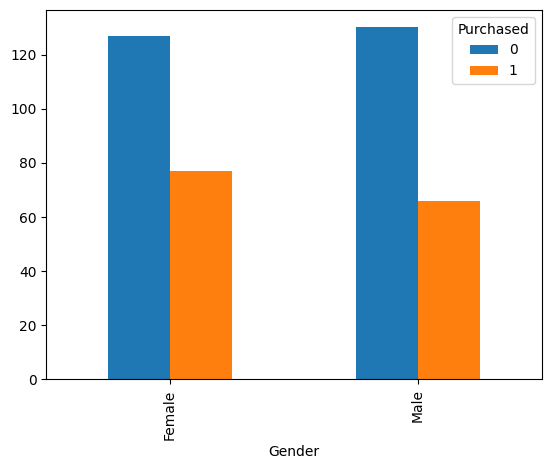

In [13]:
pd.crosstab(df['Gender'], df['Purchased']).plot(kind='bar')

In [15]:
dummies = pd.get_dummies(df['Gender'], prefix='Gender')
dummies.head()

,Gender_Female,Gender_Male
0,False,True
1,False,True
2,True,False
3,True,False
4,False,True


In [16]:
merged = pd.concat([subdf, dummies], axis='columns')
merged.head()

,Age,EstimatedSalary,Gender,Gender_Female,Gender_Male
0,19,19000,Male,False,True
1,35,20000,Male,False,True
2,26,43000,Female,True,False
3,27,57000,Female,True,False
4,19,76000,Male,False,True


In [17]:
merged.drop('Gender', axis='columns', inplace=True)

In [18]:
merged.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,False,True
1,35,20000,False,True
2,26,43000,True,False
3,27,57000,True,False
4,19,76000,False,True


In [19]:
x = merged
x.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,False,True
1,35,20000,False,True
2,26,43000,True,False
3,27,57000,True,False
4,19,76000,False,True


In [20]:
y = df['Purchased']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

In [22]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [23]:
reg.fit(X_train, y_train)

C:\python 3.10.1\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
len(X_train)

280

In [26]:
len(X_test)

120

In [27]:
reg.predict(X_test)

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [30]:
reg.predict([[34, 49000, 1, 0]])

C:\python 3.10.1\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [33]:
reg.score(X_test, y_test)   #Acuuracy

0.8833333333333333

In [32]:
reg.predict([[67, 24000, 0, 1]])

C:\python 3.10.1\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [34]:
y_predicted = reg.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_predicted)

In [36]:
cm

array([[75,  8],
       [ 6, 31]])

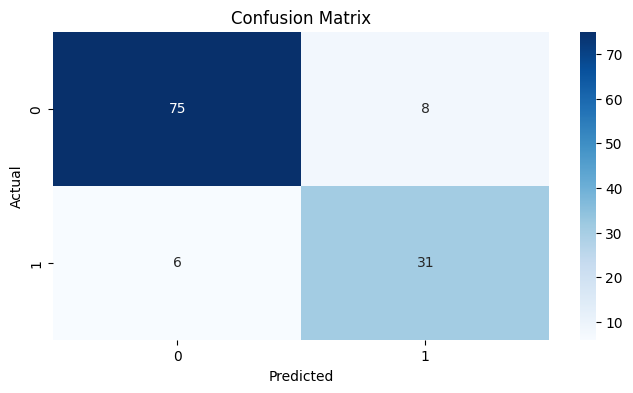

In [37]:
import seaborn as sn
plt.figure(figsize = (8,4))
sn.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()